# DIABETES PREDICTION

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Standardisation
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier #for Voting Classifier

from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve \
,average_precision_score, precision_recall_curve, precision_score, f1_score

# LOADING THE DATASET

In [8]:
diabetes = pd.read_csv('diabetes.csv')
dia=diabetes.iloc[1:]

In [9]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [10]:
dia.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
dia.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [14]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# UNIVARIATE ANALYSIS

<Axes: ylabel='Pregnancies'>

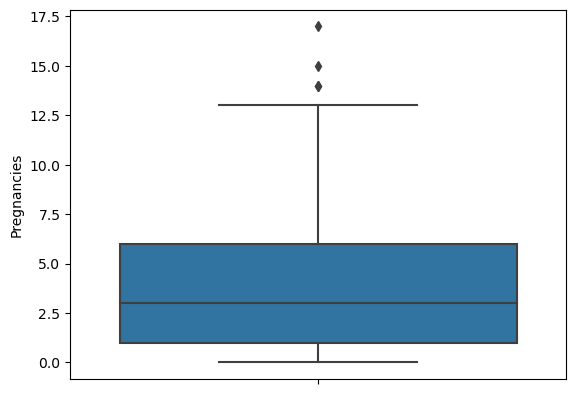

In [15]:
sns.boxplot(y='Pregnancies',data=dia)

<Axes: ylabel='Glucose'>

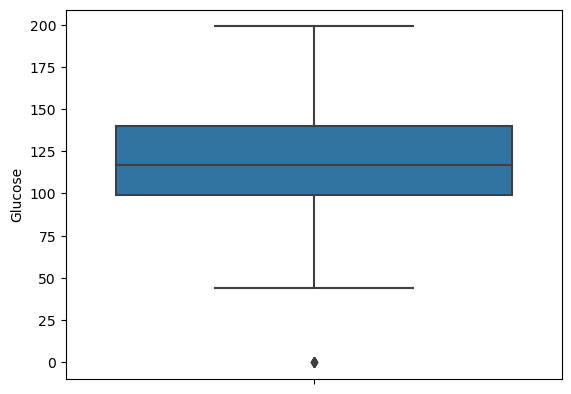

In [16]:
sns.boxplot(y='Glucose',data=dia)

<Axes: ylabel='BloodPressure'>

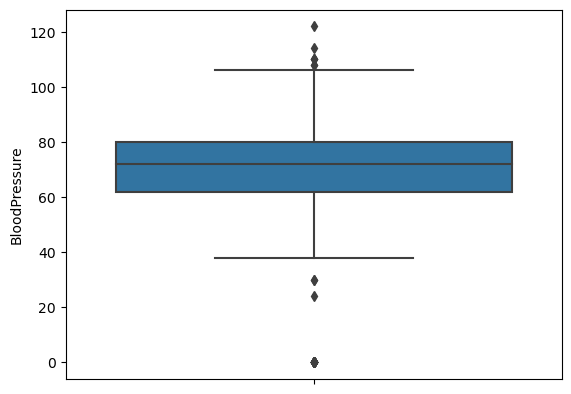

In [17]:
sns.boxplot(y='BloodPressure',data=dia)

<Axes: ylabel='Insulin'>

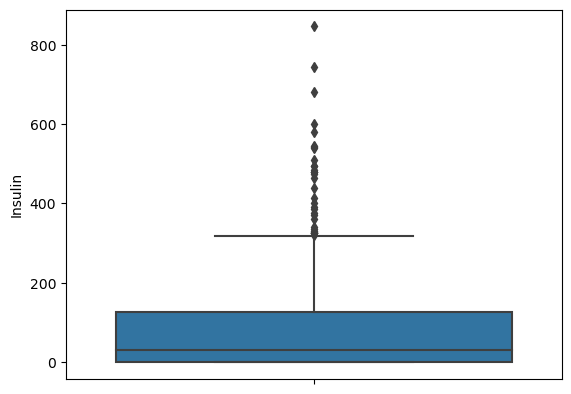

In [18]:
sns.boxplot(y='Insulin',data=dia)

<Axes: ylabel='BMI'>

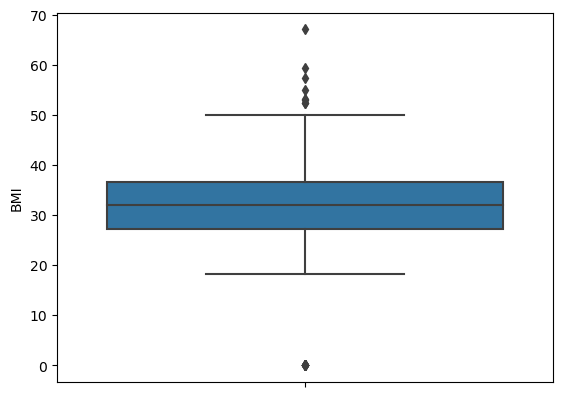

In [19]:
sns.boxplot(y='BMI',data=dia)

<Axes: ylabel='Age'>

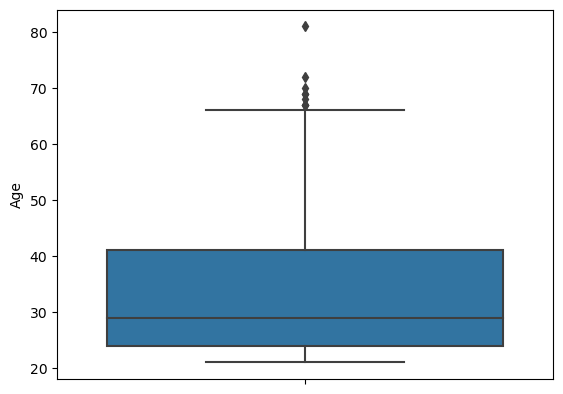

In [20]:
sns.boxplot(y='Age',data=dia)

<Axes: ylabel='DiabetesPedigreeFunction'>

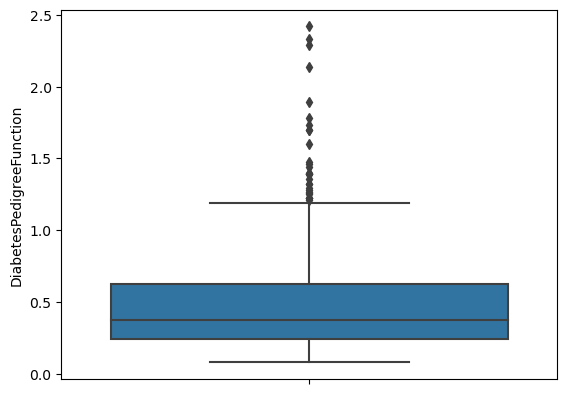

In [21]:
sns.boxplot(y='DiabetesPedigreeFunction',data=dia)

In [22]:
IQR= dia['Pregnancies'].quantile(0.75)-dia['Pregnancies'].quantile(0.25)
ul = dia['Pregnancies'].quantile(0.75) + 1.5*IQR
ll = dia['Pregnancies'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['Pregnancies']>=ul) | (dia['Pregnancies']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 5.0
UPPERLIMIT is 13.5
LOWERLIMIT is -1.5
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [23]:
IQR= dia['Glucose'].quantile(0.75)-dia['Glucose'].quantile(0.25)
ul = dia['Glucose'].quantile(0.75) + 1.5*IQR
ll = dia['Glucose'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['Glucose']>=ul) | (dia['Glucose']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 41.0
UPPERLIMIT is 201.5
LOWERLIMIT is 78.5
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
47,2,71,70,27,0,28.0,0.586,22,0
55,1,73,50,10,0,23.0,0.248,21,0
62,5,44,62,0,0,25.0,0.587,36,0
75,1,0,48,20,0,24.7,0.140,22,0
76,7,62,78,0,0,32.6,0.391,41,0
81,2,74,0,0,0,0.0,0.102,22,0
97,1,71,48,18,76,20.4,0.323,22,0
113,4,76,62,0,0,34.0,0.391,25,0
117,5,78,48,0,0,33.7,0.654,25,0


In [24]:
IQR= dia['BloodPressure'].quantile(0.75)-dia['BloodPressure'].quantile(0.25)
ul = dia['BloodPressure'].quantile(0.75) + 1.5*IQR
ll = dia['BloodPressure'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['BloodPressure']>=ul) | (dia['BloodPressure']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 18.0
UPPERLIMIT is 107.0
LOWERLIMIT is 53.0
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
715,7,187,50,33,392,33.9,0.826,34,1
729,2,92,52,0,0,30.1,0.141,22,0


In [25]:
IQR= dia['SkinThickness'].quantile(0.75)-dia['SkinThickness'].quantile(0.25)
ul = dia['SkinThickness'].quantile(0.75) + 1.5*IQR
ll = dia['SkinThickness'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['SkinThickness']>=ul) | (dia['SkinThickness']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 32.0
UPPERLIMIT is 80.0
LOWERLIMIT is -16.0
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [26]:
IQR= dia['Insulin'].quantile(0.75)-dia['Insulin'].quantile(0.25)
ul = dia['Insulin'].quantile(0.75) + 1.5*IQR
ll = dia['Insulin'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['Insulin']>=ul) | (dia['Insulin']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 127.5
UPPERLIMIT is 318.75
LOWERLIMIT is -63.75
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [27]:
IQR= dia['BMI'].quantile(0.75)-dia['BMI'].quantile(0.25)
ul = dia['BMI'].quantile(0.75) + 1.5*IQR
ll = dia['BMI'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['BMI']>=ul) | (dia['BMI']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 9.3
UPPERLIMIT is 50.550000000000004
LOWERLIMIT is 22.65
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
28,13,145,82,19,110,22.2,0.245,57,0
33,6,92,92,0,0,19.9,0.188,28,0
49,7,105,0,0,0,0.0,0.305,24,0
50,1,103,80,11,82,19.4,0.491,22,0
...,...,...,...,...,...,...,...,...,...
656,2,101,58,35,90,21.8,0.155,22,0
673,3,123,100,35,240,57.3,0.880,22,0
684,5,136,82,0,0,0.0,0.640,69,0
706,10,115,0,0,0,0.0,0.261,30,1


In [28]:
IQR= dia['DiabetesPedigreeFunction'].quantile(0.75)-dia['DiabetesPedigreeFunction'].quantile(0.25)
ul = dia['DiabetesPedigreeFunction'].quantile(0.75) + 1.5*IQR
ll = dia['DiabetesPedigreeFunction'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['DiabetesPedigreeFunction']>=ul) | (dia['DiabetesPedigreeFunction']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 0.3815
UPPERLIMIT is 1.19725
LOWERLIMIT is 0.052749999999999964
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [29]:
IQR= dia['Age'].quantile(0.75)-dia['Age'].quantile(0.25)
ul = dia['Age'].quantile(0.75) + 1.5*IQR
ll = dia['Age'].quantile(0.75) - 1.5*IQR
outlier = dia[(dia['Age']>=ul) | (dia['Age']<=ll)]
print("IQR is",IQR)
print("UPPERLIMIT is",ul)
print("LOWERLIMIT is",ll)
print("OUTLIERS are")
print()
outlier

IQR is 17.0
UPPERLIMIT is 66.5
LOWERLIMIT is 15.5
OUTLIERS are



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


# HANDLING OUTLIERS

In [30]:
dia['Pregnancies'][88]=3.845052
dia['Pregnancies'][159]=3.845052
dia['Pregnancies'][298]=3.845052
dia['Pregnancies'][455]=3.845052

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\514485328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Pregnancies'][88]=3.845052
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\514485328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Pregnancies'][159]=3.845052
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\514485328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Pregnancies'][298]=3.845052
C:\Users\US

<Axes: ylabel='Pregnancies'>

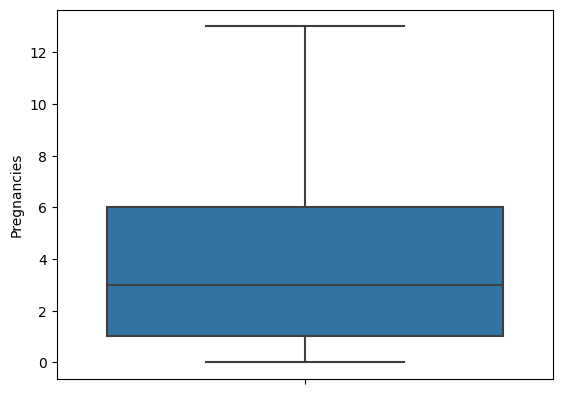

In [31]:
sns.boxplot(y='Pregnancies',data=dia)

In [32]:
for i in range(6,738):
    if dia['Glucose'][i]<=ll:
        dia['Glucose'][i]=dia['Glucose'].quantile(0.5)


C:\Users\USER\AppData\Local\Temp\ipykernel_4092\3962653532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Glucose'][i]=dia['Glucose'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\3962653532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Glucose'][i]=dia['Glucose'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\3962653532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Glucose

<Axes: ylabel='Glucose'>

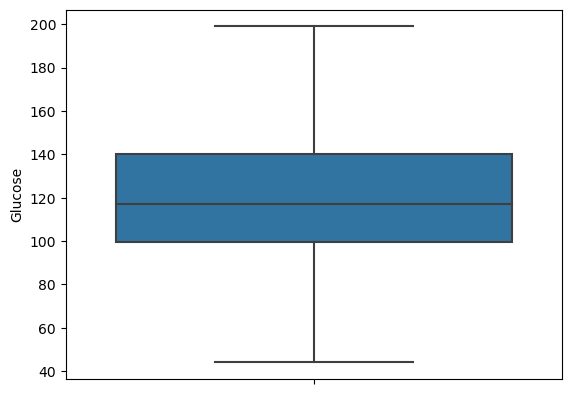

In [33]:
sns.boxplot(y='Glucose',data=dia)

In [34]:
for i in range(4,742):
    if dia['BloodPressure'][i]<=ll:
        dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.5)
    if dia['BloodPressure'][i]>=ul:
        dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BloodPressure'][i]=dia['BloodPressure'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\2845571555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

<Axes: ylabel='BloodPressure'>

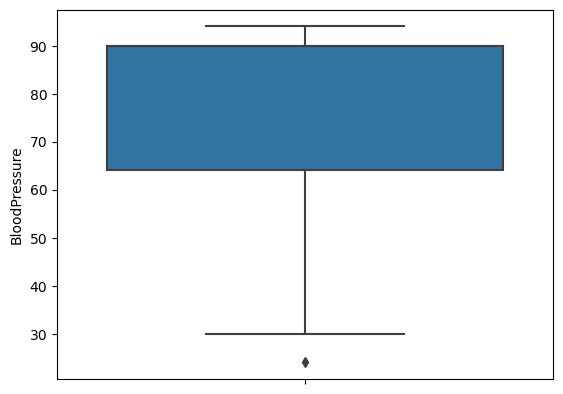

In [35]:
sns.boxplot(y='BloodPressure',data=dia)

In [36]:
dia['SkinThickness'][578]=dia['SkinThickness'].quantile(0.75)

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1431473040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['SkinThickness'][578]=dia['SkinThickness'].quantile(0.75)


<Axes: ylabel='SkinThickness'>

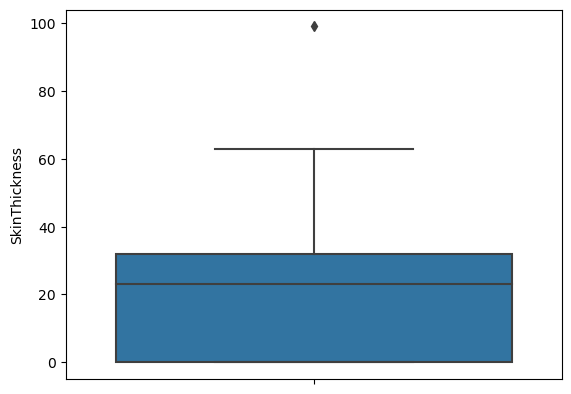

In [37]:
sns.boxplot(y='SkinThickness',data=dia)

In [38]:
for i in range(8,754):
    if dia['Insulin'][i]<=ll:
        dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
    if dia['Insulin'][i]>=ul:
        dia['Insulin'][i]=dia['Insulin'].quantile(0.95)

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insuli

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insul

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insuli

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insuli

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insul

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insul

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.5)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insulin'][i]=dia['Insulin'].quantile(0.95)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1447137878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Insuli

<Axes: ylabel='Insulin'>

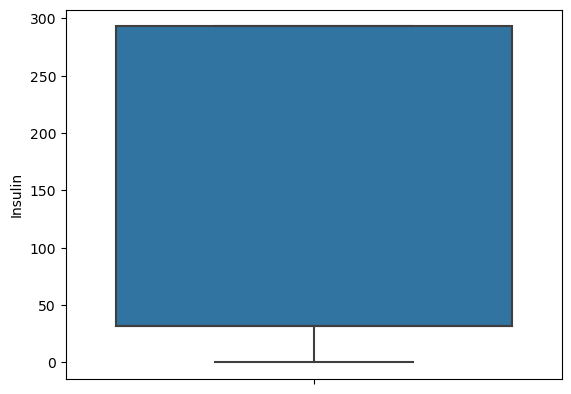

In [39]:
sns.boxplot(y='Insulin',data=dia)

In [40]:
for i in range(9,763):
    if dia['BMI'][i]<=22.65:
        dia['BMI'][i]=20
    if dia['BMI'][i]>=50.550000000000004:
        dia['BMI'][i]=50
    

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\3712698703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BMI'][i]=20
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\3712698703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['BMI'][i]=50


<Axes: ylabel='BMI'>

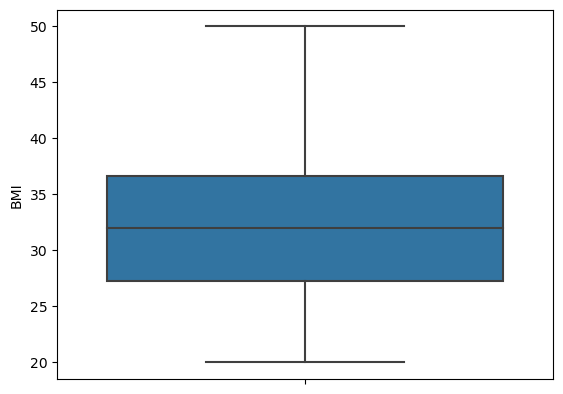

In [41]:
sns.boxplot(y='BMI',data=dia)

In [42]:
for i in range(0,768):
    dia['DiabetesPedigreeFunction'][i]=0.44099999999999995

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1728730687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['DiabetesPedigreeFunction'][i]=0.44099999999999995
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1728730687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['DiabetesPedigreeFunction'][i]=0.44099999999999995


<Axes: ylabel='DiabetesPedigreeFunction'>

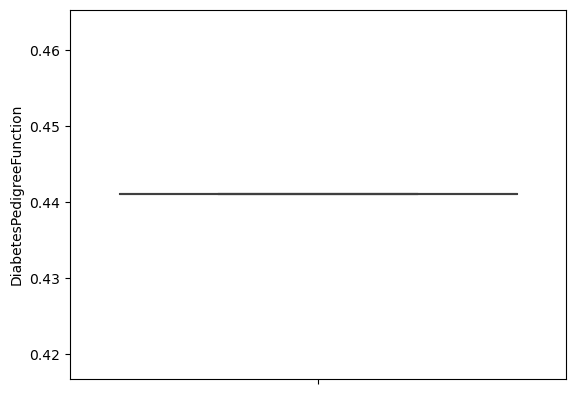

In [43]:
sns.boxplot(y='DiabetesPedigreeFunction',data=dia)

In [44]:
for i in range(123,685):
    if dia['Age'][i]<=ll:
        dia['Age'][i]=dia['Age'].quantile(0.25)
    if dia['Age'][i]>=ul:
        dia['Age'][i]=dia['Age'].quantile(0.75)

C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1305956709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Age'][i]=dia['Age'].quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1305956709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Age'][i]=dia['Age'].quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_4092\1305956709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia['Age'][i]=dia['Age'].q

<Axes: ylabel='Age'>

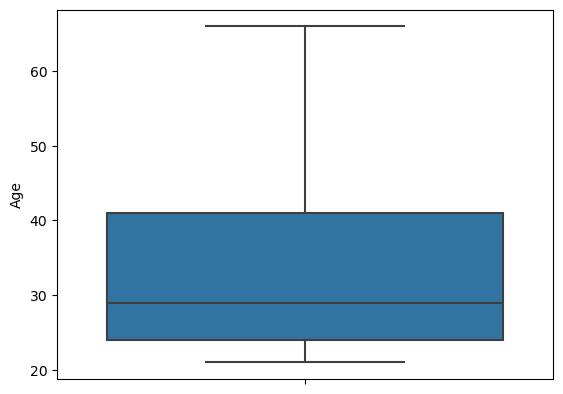

In [45]:
sns.boxplot(y='Age',data=dia)

# SPLITTING THE DATASET

In [46]:
feature_cols=['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X=dia[feature_cols]
y=dia.Outcome

In [47]:
y=dia.iloc[:,-1].values

In [48]:
X.shape

(767, 7)

In [49]:
y.shape

(767,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0)

In [51]:
X_train.shape

(575, 7)

In [52]:
X_test.shape

(192, 7)

In [53]:
y_train.shape

(575,)

In [54]:
y_test.shape

(192,)

# BULDING THE MODEL

# LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [93]:
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# ACCURACY CALCULATION

In [58]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[120  11]
 [ 27  34]]


In [59]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted Non diabetic', 'Predicted diabetic']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual non diabetic', 1 : 'Actual diabetic'})
confusion_matrix

,Predicted Non diabetic,Predicted diabetic
Actual non diabetic,120,11
Actual diabetic,27,34


In [60]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 80.0
F1 score is : 64.0
Precision is  : 76.0
Recall is  : 55.74
Roc Auc is  : 74.0


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       131
           1       0.76      0.56      0.64        61

    accuracy                           0.80       192
   macro avg       0.79      0.74      0.75       192
weighted avg       0.80      0.80      0.79       192



# KNN CLASSIFIER

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
662,8.0,293,37.6,43,167,90,0.441
123,5.0,32,26.8,41,132,90,0.441
114,7.0,293,30.5,39,160,54,0.441
15,7.0,32,30.0,32,100,90,0.441
530,2.0,293,29.8,22,122,60,0.441
...,...,...,...,...,...,...,...
367,0.0,32,20.0,21,101,64,0.441
302,5.0,42,35.8,35,77,90,0.441
383,1.0,59,25.1,25,90,62,0.441
141,5.0,32,39.5,38,106,90,0.441


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)

array([[106,  25],
       [ 26,  35]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.734375

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [67]:
y_pred1 = knn.predict(X_test)


In [68]:
confusion_matrix(y_test,y_pred1)

array([[118,  13],
       [ 26,  35]], dtype=int64)

# ACCURACY

In [69]:
accuracy_score(y_test,y_pred1)

0.796875

# DECISION TREE

In [70]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [72]:
y_test


array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
confusion_matrix(y_test,y_pred)

array([[104,  27],
       [ 30,  31]], dtype=int64)

# ACCURACY

In [74]:
accuracy_score(y_test,y_pred)

0.703125

# Random Forest

In [75]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,n_jobs=2,random_state=0)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4


array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# ACCURACY

In [77]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred4)

array([[116,  15],
       [ 24,  37]], dtype=int64)

In [78]:
accuracy_score(y_test,y_pred4)

0.796875

# PREDICTION BY USING LOGISTIC REGRESSION

In [95]:
prediction=lr.predict(np.array([[1,70,60.7,31,285,66,0.331]]))

C:\Users\USER\anaconda2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [96]:
prediction

array([1], dtype=int64)

In [102]:
p=lr.predict(np.array([[8,100,23.3,32,393,4,0.672]]))

C:\Users\USER\anaconda2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
p

array([1], dtype=int64)

In [113]:
q=lr.predict(np.array([[5,32,26.8,41,132,90,0.441]]))


C:\Users\USER\anaconda2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [114]:
q

array([0], dtype=int64)

In [115]:
r=knn.predict(np.array([[2,543,30.5,53,197,70,0.158]]))

C:\Users\USER\anaconda2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [116]:
r

array([1], dtype=int64)